# Car Reviews

## Part 1

### So the first approach includes the following:
<ol>
<li>Opening with a csv reader</li>
<li> Lowering text</li>
<li>Applying stopwords filtering</li>
<li>Stemming</li>
<li>Feature Extraction</li>
<li>Using a Multinomial classifier</li>
</ol>

### car_reviews.csv should be in the same folder to run

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics import plot_confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import random
import time
import re

def rejoin_words(row):
    joined_words = (" ".join(row))
    return joined_words

def remove_special_characters(text):
    pat = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

def word_preprocessing(word):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    word = remove_special_characters(word)
    word_tokens = word_tokenize(word)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    stemmed_sentence = [ps.stem(w) for w in filtered_sentence]
    rejoined_string = rejoin_words(stemmed_sentence)
    return rejoined_string


def preprocessing(reviews_list):
    reviews_list['Review'] = reviews_list['Review'].str.lower()
    for i in range(len(reviews_list)):
        row = reviews_list.iloc[i]
        review = row['Review']
        reviews_list.iloc[i]['Review'] = word_preprocessing(review)
    return reviews_list


def feature_extraction(reviews_list):
    CountVec = CountVectorizer()
    Count_data = CountVec.fit_transform(reviews_list['Review'])
    cv_dataframe = pd.DataFrame(Count_data.toarray(), columns=CountVec.get_feature_names())
    cv_dataframe['Sentiment'] = reviews_list['Sentiment']
    # cv_dataframe.to_csv(path_or_buf="dataframe.csv", index=False)
    train, test = train_test_split(cv_dataframe, test_size=0.2)
    return train, test


def predict(model, test, train):
    Y = test[train.columns[-1]]
    X = test.iloc[:, :-1]
    all_predictions = model.predict(X)
    plot_confusion_matrix(model, X, Y)
    print(accuracy_score(Y, all_predictions))
    scores = cross_val_score(model, X, Y, cv=10)
    print(scores)
    print("%f accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))


def model_train(train):
    model = MultinomialNB().fit(train.iloc[:, :-1], train[train.columns[-1]])
    return model


def csv_reader(filename):
    reviews_list = pd.read_csv(filename)
    return reviews_list

def execute_car_reviews():
    start_time = time.time()
    reviews_list = csv_reader("car-reviews.csv")
    filtered = preprocessing(reviews_list)
    train, test = feature_extraction(reviews_list)
    model = model_train(train)
    predict(model, test, train)
    print("--- %s seconds ---" % (time.time() - start_time))

### Let's look at the afformentioned parts in more detail.

* Does the submission demonstrate that words with the same stem have been
appropriately recognised and treated as variations of the stem? This should be
demonstrated for at least 3 different stems.

In [2]:
sentence = "Programers program with programing languages"
print(word_preprocessing(sentence))

sentence = "People are more likely being liked by people who have similar likings"
print(word_preprocessing(sentence))

reviews_list = csv_reader("car-reviews.csv")
print(reviews_list.head(1).to_string())
filtered = preprocessing(reviews_list)
print(filtered.head(1).to_string())


program program program languag
peopl like like peopl similar like
  Sentiment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Review
0       Neg   In 1992 we bought a new Taurus and we really loved it  So in 1999 we decided to tr

We can clearly see that for different variations of 'program' or 'like', the stemming algorithm produces the same stem. 
<br>program program program languag<br>
peopl like like peopl similar like

Same functionality works in the full csv

* Does the code produce some output to demonstrate that a vector has been created
for each review, where each element in the vector represents EITHER a binary
variable indicating the presence of a word/stem in a review OR the number of times
that a word (or word stem) appears? Note that the output does not need to show
the vector for all reviews, this only needs to contain a small sample of reviews.

In [3]:
reviews_list = csv_reader("car-reviews.csv")
head = reviews_list.head(5).copy()
filtered = preprocessing(head)
train, test = feature_extraction(head)
train

,ab,abl,acceler,accid,activ,actuat,ad,addit,air,allow,...,within,work,worri,would,wrong,xlt,yard,year,yet,Sentiment
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,2,0,0,0,0,0,Neg
2,0,0,0,0,0,0,0,1,3,0,...,3,1,0,0,1,0,1,1,0,Neg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,Neg
4,0,1,1,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,Neg


We used a CountVectorizer initially, which what it does is to convert a collection of a text document to a matrix of token counts. The output below demonstrates that a vector has been created for each review (4 for the train set and 1 for the test) and represents the number of times the stem appears.

* Does the code clearly show that an appropriate Naïve Bayes model has been used
for classification, either through the use of an existing library or coded from scratch.

In [4]:
def model_train(train):
    model = MultinomialNB().fit(train.iloc[:, :-1], train[train.columns[-1]])
    return model

model = model_train(train)

We have used a Multinomial Classifier using the scikit-learn API. The multinomial Naïve Bayes classifier is suitable for classification with word counts for sentiment analysis such as this one.

* Does the code clearly show that 80% of the data has been used to train the
classification model, and that the remaining 20% of the data set has been used as
test data? AND does it show that only the training data has been used up to the
point where the model has been trained (no test data)? AND is the code able to
cope with words that appear in the test data but not in the training dataset?

In [5]:
reviews_list = csv_reader("car-reviews.csv")
print(reviews_list.shape)
filtered = preprocessing(reviews_list)
train, test = feature_extraction(reviews_list)
print(train.shape)
print(test.shape)

(1382, 2)
(1105, 9895)
(277, 9895)


1382*0.8 $\approx$ 1105


1382*0.2 $\approx$ 277

So we would expect arrays of 1105 rows for the train model 
and 277 for the test model

* Does the code output a confusion matrix demonstrating the performance of the
Naïve Bayes classifier? The confusion matrix must clearly indicate the proportion of
True Negatives, False Positives, False Negatives and True Positives.

0.7545126353790613
[0.71428571 0.67857143 0.78571429 0.67857143 0.71428571 0.75
 0.78571429 0.74074074 0.85185185 0.62962963]
0.732937 accuracy with a standard deviation of 0.061109
--- 12.193392992019653 seconds ---


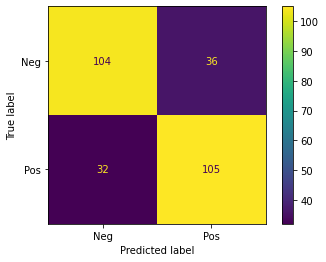

In [6]:
execute_car_reviews()

So we have 105 true negatives 

29 false negatives

32 false positives

111 true positives

## Part 2

* Does the Jupyter notebook include a markdown/comment section that
clearly explains how the approach taken in part two is expected to
improve on the solution to part one. Are the reasons for the expected
improvements clearly justified and explained with one or more references
(e.g. to a published source scientific paper, article, book)?



So my approach to improve the existing implementation was mainly four-fold. 
* Consistenly find a way to judge the score.

* Change CountVectorizer to tf-idf 

* Change Stemming to Lemmatization 

* Change The naive bayes approach to complement naive bayes. 

Reasons for taking this approach:

While doing a 80/20 cut and getting an accuracy score is a way to identify whether a model is improving or not, to avoid overfitting or judge if we are indeed getting better, we need to have a way to evaluate our performance more consistently. We cannot be sure if a change is making our model better or this random 80/20 worked well on this change but not in other 80/20 cuts, especially if the data we have is limited. That's why we use K-folds which generally results in a less biased model compared to other methods. In K folds we split the entire data randomly into K folds. Then split the model using K-1 folds and validate the model using the remaining Kth fold. Repeat the process until every K-fold serve as the test set. That will be the performance metric for the model.

https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f (acessed on 11 April 2021)

<ins> The CountVectorizer will just count the number of words occured in each document.
The main issue with this Term Frequency is that it will give more weight to longer documents.<ins>
    
IDF(Inverse Document Frequnecy) measures the amount of information a given word provides across the document.IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.

<ins>TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix.<ins> 
    
It is the product of TF and IDF. A word with high tf-idf in a document is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word.
$idf(W) = \log\frac{documents}{documents containing word W}$


https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk(accessed on 11 April 2021). 


The third approach would be to change stemming to lemmatization to check whether we would get any performance improvement. Whether lemmatization should be included or not is not just a plain answer. TF-IDF and Latent Dirichlet allocation would probably aid in getting better results. Furthermore depending on the type of application, some would benefit (topic modeling) and other wouldn't. The conservative way is to not lemmatize. But the general rule of thumb should be to not lemmatize unless there is a significant performance improvement.
According to source https://opendatagroup.github.io/data%20science/2019/03/21/preprocessing-text.html (accessed on 6 April 2021).
    
Fourth approach would be to try altering to a Complement Naive Bayes Classifier. A Complement Naive Bayes classifier works well for imbalanced datasets such as this one where one review might be much bigger than some other review resulting in different weights between reviews. Complement Naive Bayes differs from Multinomial Naive Bayes in the sense that instead of calculating the probability of an item belonging to a certain class, we calculate the probability of the item belonging to all classes.
https://www.geeksforgeeks.org/complement-naive-bayes-cnb-algorithm/ (accessed on 13 April 2021)


* Does the submission clearly explain the steps that have been taken to
implement the improved approach? These should be written in a way that
one of your peers who may not have researched the same approach could understand. This may consist of code comments, Jupyter markdown, or a
mix of both.

* Does the code implement the described approach appropriately? (i.e.
does the code actually do what is described?)

The steps taken to implement the improved approach are explained below with code segments that implement the described approach appropriately.

1. For the first approach we already went back and filled the k fold in Part1 Predict() function to have a consistent way 
of evaluating the model throughout the whole evaluation.

Lines filled are:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv=10)

2. Second approach adds TfidfVectorizer. We tweaked the max_features property which only considers the first 4000 features with the best ranking to get better performance.

0.779783393501805
[0.71428571 0.67857143 0.75       0.82142857 0.89285714 0.71428571
 0.75       0.77777778 0.74074074 0.81481481]
0.765476 accuracy with a standard deviation of 0.059855
--- 13.207979679107666 seconds ---


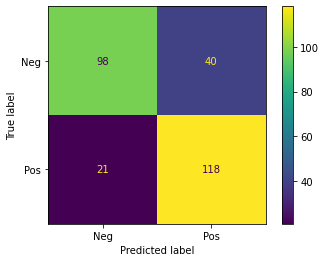

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

def feature_extraction(reviews_list):
    # Changing to a tfidf vectorizer instead of a CountVectorizer
    tfidf = TfidfVectorizer(max_features=4000)
    Count_data = tfidf.fit_transform(reviews_list['Review'])
    cv_dataframe = pd.DataFrame(Count_data.toarray(), columns=tfidf.get_feature_names())
    cv_dataframe['Sentiment'] = reviews_list['Sentiment']
    train, test = train_test_split(cv_dataframe, test_size=0.2)
    train.to_csv(path_or_buf="train2.csv", index=False)
    return train, test


execute_car_reviews()

3. Third approach to improve our model is lemmatization. Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters and gets the stem which often times is not meaningful. For example stemming "history" results in getting its stem "histori" which is not a valid english word. Lemmatization for "history" or "historical" would return back its lemma "history" which is a valid word of the english dictionary

E.g 

Stem                                

history --------> histori

historical -----> histori  

Lemmatization

history --------> history

historical -----> history

Additionally lemmatization would correctly identify the base of "caring" to "care". 

Stemmming would wrongly cutoff the ing part and convert it to car

0.8014440433212996
[0.75       0.78571429 0.82142857 0.67857143 0.75       0.67857143
 0.67857143 0.7037037  0.88888889 0.66666667]
0.740212 accuracy with a standard deviation of 0.070074
--- 8.092357397079468 seconds ---


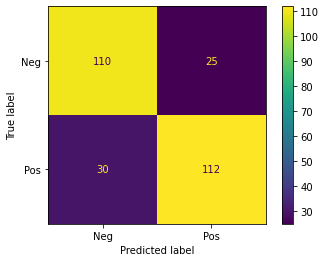

In [7]:
def word_preprocessing(word):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    word = remove_special_characters(word)
    word_tokens = word_tokenize(word)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    lemmatized_sentence = [lemmatizer.lemmatize(k) for k in filtered_sentence]
    rejoined_string = rejoin_words(lemmatized_sentence)
    return rejoined_string

execute_car_reviews()

Complement Naive Bayes is an adaptation of the standard multinomial naive Bayer algorithm that
is particularly suited for imbalanced data sets. Complemement Naive Bayes also does a second normalization
which addressed the tendency for longer documents to dominate parameter estimates like in Multinomial Naive Bayes. 
https://scikit-learn.org/stable/modules/naive_bayes.html(accessed on 11 April 2021)

0.8122743682310469
[0.85714286 0.78571429 0.82142857 0.67857143 0.78571429 0.85714286
 0.75       0.62962963 0.88888889 0.7037037 ]
0.775794 accuracy with a standard deviation of 0.080612
--- 13.380029439926147 seconds ---


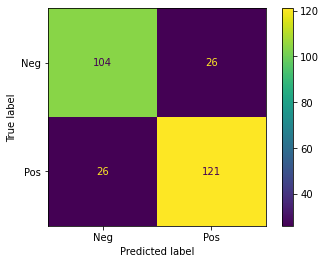

In [18]:
from sklearn.naive_bayes import ComplementNB

def model_train(train):
    model = ComplementNB().fit(train.iloc[:, :-1], train[train.columns[-1]])
    return model

execute_car_reviews()

### So the improved version is below:
This one consists of:
<ol>
<li> Opening with a csv reader</li>
<li> Lowering text</li>
<li> Applying stopwords filtering</li>
<li> Stemming</li>
    We decided to keep stemming instead of lemmatization since we didn't see any significant advantage if not regression.
<li> Tf-Idf Vectorizer for feature extarction </li>
    
<li>Using a Complement Multinomial classifier</li>
</ol>

0.7942238267148014
[0.82142857 0.75       0.75       0.85714286 0.82142857 0.71428571
 0.78571429 0.85185185 0.66666667 0.88888889]
0.790741 accuracy with a standard deviation of 0.066517
--- 38.80933117866516 seconds ---


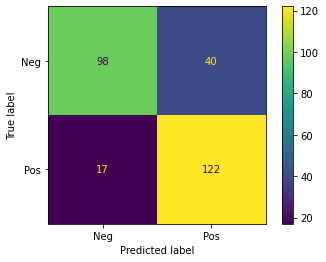

In [21]:
from sklearn.naive_bayes import ComplementNB
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics import plot_confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import random
import time
import re

def rejoin_words(row):
    joined_words = (" ".join(row))
    return joined_words

def remove_special_characters(text):
    pat = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

def word_preprocessing(word):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    word = remove_special_characters(word)
    word_tokens = word_tokenize(word)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    stemmed_sentence = [ps.stem(w) for w in filtered_sentence]
    rejoined_string = rejoin_words(stemmed_sentence)
    return rejoined_string


def preprocessing(reviews_list):
    reviews_list['Review'] = reviews_list['Review'].str.lower()
    for i in range(len(reviews_list)):
        row = reviews_list.iloc[i]
        review = row['Review']
        reviews_list.iloc[i]['Review'] = word_preprocessing(review)
    return reviews_list


def feature_extraction(reviews_list):
    tfidf = TfidfVectorizer(max_features=4000)
    # Is used for the initial fitting of parameters on the training set x, while also returning the transformed x'
    Count_data = tfidf.fit_transform(reviews_list['Review'])
    cv_dataframe = pd.DataFrame(Count_data.toarray(), columns=tfidf.get_feature_names())
    cv_dataframe['Sentiment'] = reviews_list['Sentiment']
    train, test = train_test_split(cv_dataframe, test_size=0.2)
    train.to_csv(path_or_buf="train2.csv", index=False)
    return train, test

def predict(model, test, train):
    Y = test[train.columns[-1]]
    X = test.iloc[:, :-1]
    all_predictions = model.predict(X)
    plot_confusion_matrix(model, X, Y)
    print(accuracy_score(Y, all_predictions))
    scores = cross_val_score(model, X, Y, cv=10)
    print(scores)
    print("%f accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))


def model_train(train):
    model = ComplementNB().fit(train.iloc[:, :-1], train[train.columns[-1]])
    return model


def csv_reader(filename):
    reviews_list = pd.read_csv(filename)
    return reviews_list

def execute_car_reviews():
    start_time = time.time()
    reviews_list = csv_reader("car-reviews.csv")
    filtered = preprocessing(reviews_list)
    train, test = feature_extraction(reviews_list)
    model = model_train(train)
    predict(model, test, train)
    print("--- %s seconds ---" % (time.time() - start_time))

execute_car_reviews()

* So part 1:

[0.85714286 0.67857143 0.71428571 0.82142857 0.85714286 0.60714286
 0.64285714 0.62962963 0.66666667 0.81481481]
 
0.728968 mean accuracy with a standard deviation of 0.093562

--- 10.12574291229248 seconds ---

0.728968 accuracy with a standard deviation of 0.093562

[[105 32]
[29 111]]

* Part 2 second approach with tf-idf gives:

[0.75       0.75       0.75       0.85714286 0.67857143 0.67857143
 0.67857143 0.7037037  0.66666667 0.81481481]
 
0.732804 mean accuracy with a standard deviation of 0.060924
0.7689530685920578

[[103 46]
[29 108]]

* Third approach with lemmatization seems to result in some regression:
[0.75       0.67857143 0.64285714 0.75       0.75       0.57142857
 0.67857143 0.81481481 0.62962963 0.77777778]
 
0.704365 mean accuracy with a standard deviation of 0.072255

0.696693 accuracy with a standard deviation of 0.072165

[[92 35]
[29 121]]

* Fourth approach Tf-idf with ComplementNB and stemming instead of lemmatization:

[0.82142857 0.75       0.75       0.85714286 0.82142857 0.71428571
 0.78571429 0.85185185 0.66666667 0.88888889]
 
0.790741 accuracy with a standard deviation of 0.066517

--- 38.80933117866516 seconds ---

0.8122743682310469

[[98 40]
[17 122]]



* Does the code output a new classification matrix for the “improved” part
two approach AND Is there markdown or comment that clearly discusses
and compares the performance of the part one and part two classification
approaches and explains whether or not the expected improvements were
achieved (and why this may be the case).

So Part1 results in a relatively good first result which could benefit some enhancements. Then tf-idf shows that there is some benefit from taking this approach. Lemmatization makes no inprovement if not making the run worse where as we would expect it to make it slightly better. Maybe some tuning with POS tagging would bring the desired results.
Finally Complement Naive Bayes significantly improves the performace.

Part1 results:
[0.85714286 0.67857143 0.71428571 0.82142857 0.85714286 0.60714286
 0.64285714 0.62962963 0.66666667 0.81481481]
 
0.728968 mean accuracy with a standard deviation of 0.093562

--- 10.12574291229248 seconds ---

0.728968 accuracy with a standard deviation of 0.093562

[[105 32]
[29 111]]

Part 2 results:
* Fourth approach Tf-idf with ComplementNB and stemming instead of lemmatization:

[0.82142857 0.75       0.75       0.85714286 0.82142857 0.71428571
 0.78571429 0.85185185 0.66666667 0.88888889]
 
0.790741 accuracy with a standard deviation of 0.066517

--- 38.80933117866516 seconds ---

0.8122743682310469

[[98 40]
[17 122]]

 #### As we can see the improved version is doing much better in finding the true negatives. Only 17 false negatives. Sligthly worse in finding true positives 111/32 = 3.4 compared to 122/40 = 3.05. 
 
### Standard deviation is less in the improved version which means the values don't differ as much from the mean value. 

### Mean value is again 0.790741 on the improved compared to 0.728968 on the reference.

### Average accuracy of the improved version is 0.790741 compared to 0.728968 which is considerably worse.

### A slight caveat is that timewise the improved version is taking 38.80933117866516 seconds compared to 10.12574291229248

### Overall the improved version excluding lemmatization which wasn't succesfull is clearly better judging from the above evaluation metrics.